## Statistics & Probability

This note is just a brief introduction of Statistics and Probability. Attempt to explain the connection between them. 
Several other resources are recommended.

> Sources: 

> 1. [Intro to Probability (MIT)](https://www.youtube.com/watch?v=WTyLg_I1oFY&list=PLUl4u3cNGP60hI9ATjSFgLZpbNJ7myAg6&index=5)
> 2. [Fundamentals of Statistics](https://www.youtube.com/watch?v=VPZD_aij8H0)
> 3. [Hackerrank 10 Days of Stats](https://www.hackerrank.com/domains/tutorials/10-days-of-statistics?filters%5Bstatus%5D%5B%5D=unsolved&badge_type=10-days-of-statistics)

## Probability 101

* Sample Space 
* Probability Axiom
* Probability Properties 
* Discrete and Continuous

![prob.png](./images/prob.png)

In [130]:
import itertools
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import altair as alt
from scipy.stats import norm
import random
import seaborn as sns

In [19]:
## Problem 1: Dices
# Probability that 2 dices have the sum <= 9 (Event A)
sample_space = list(itertools.product(range(1,7),range(1,7))) ## Sample Space
all_outcomes = list(map(lambda o: sum(o), sample_space))
eventA_outcomes = [all_outcomes[i] for i,s in enumerate(all_outcomes) if s <= 9]
prob_eventA = len(eventA_outcomes) / len(all_outcomes)
prob_eventA

0.8333333333333334

In [73]:
print('--- Sample Space:')
print(sample_space)
print('--- Possible Outcome: count = {}'.format(len(outcome_sum)))
print(outcome_sum)
print('--- Outcomes satisfy Event A: count = {}'.format(len(eventA_outcomes)))
print(eventA_outcomes)
print('-'*20)
print('==> Prob of Event A: {:.2f}'.format(len(eventA_outcomes) / len(all_outcomes)))

--- Sample Space:
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
--- Possible Outcome: count = 36
[2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12]
--- Outcomes satisfy Event A: count = 30
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5)]
--------------------
==> Prob of Event A: 0.83


## Bayes Theorem

> P(A∣B)=P(A)P(B∣A)/P(A)

* P(A) means the probability of the event A to occur.
* P(B) means the probability of the event B to occur.
* P(B|A) means the probability of the event B to occur, knowing that the event A occured.
Finally, P(A|B) means the probability of the event A to occur, knowing that the event B occured.

In [11]:
## Problem 2: Dices
# Probability that 2 dices have different numbers (Event A), sum = 6 (Event B)
sample_space = list(itertools.product(range(1,7),range(1,7))) ## Sample Space
all_sum_outcomes = list(map(lambda o: sum(o), sample_space))
eventA_space = [o for o in sample_space if o[0] != o[1]]
eventA_sum_outcomes = list(map(lambda o: sum(o), eventA_space))
eventB_space = [sample_space[i] for i,s in enumerate(all_sum_outcomes) if s == 6]
eventB_sum_outcomes = list(map(lambda o: sum(o), eventB_space))
eventB_givenA_outcomes = [eventA_space[i] for i,s in enumerate(eventA_sum_outcomes) if s == 6]
eventA_givenB_outcomes = [o for o in eventB_space if o[0] != o[1]]

# Proba
P_A = len(eventA_space) / len(sample_space)
P_B = len(eventB_space) / len(sample_space)
P_BA = len(eventB_givenA_outcomes) / len(eventA_space)
P_AB_bayes = (P_A * P_BA) / P_B ## Calculate by Bayes Theorem
P_AB_obs = len(eventA_givenB_outcomes) / len(eventB_space)
# comb_diff_sum = list(map(lambda o: sum(o), comb_diff))
# sum([s == 6 for s in comb_diff_sum]) / len(outcome)

In [13]:
print('--- Sample Space: count = {}'.format(len(sample_space)))
print(sample_space)
print('--- Possible Outcomes of Event A: diff num: count = {}'.format(len(eventA_space)))
print(eventA_space)
print('--- Possible Outcomes of Event B: sum =< 6: count = {}'.format(len(eventB_space)))
print(eventB_space)
print('--- Possible Outcomes of Event B, given Event A: count = {}'.format(len(eventB_givenA_outcomes)))
print(eventB_givenA_outcomes)
print('--- Possible Outcomes of Event A, given Event B: count = {}'.format(len(eventA_givenB_outcomes)))
print(eventA_givenB_outcomes)
print('-'*20)
print('==> P(A): {:.2f}'.format(P_A))
print('==> P(B): {:.2f}'.format(P_B))
print('==> P(B|A): {:.2f}'.format(P_BA))
print('==> P(A|B) - Calculated by Bayes: {:.2f}'.format(P_AB_bayes)) 
print('==> P(A|B) - Count by Observation: {:.2f}'.format(P_AB_obs))

--- Sample Space: count = 36
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
--- Possible Outcomes of Event A: diff num: count = 30
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5)]
--- Possible Outcomes of Event B: sum =< 6: count = 5
[(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)]
--- Possible Outcomes of Event B, given Event A: count = 4
[(1, 5), (2, 4), (4, 2), (5, 1)]
--- Possible Outcomes of Event A, given Event B: count = 4
[(1, 5), (2, 4), (4, 2), (5, 1)]
--------------------
==> P(A): 0.83
==> P(B): 0.14
==> P(B|A): 0.13
==> P(A|B) - Calculated by Bayes: 0.80


In [34]:
# Distribution 
df = pd.DataFrame({'outcome':sample_space, 'sum_of_out':all_sum_outcomes})
df.head()

,outcome,sum_of_out
0,"(1, 1)",2
1,"(1, 2)",3
2,"(1, 3)",4
3,"(1, 4)",5
4,"(1, 5)",6


In [33]:
alt.Chart(df).mark_bar().encode( # Uniform Distribution
    alt.X('outcome:N'), ## Group by
    y='count()' ## Aggregate Func
)

alt.Chart(...)

In [35]:
alt.Chart(df).mark_bar().encode( # Distribution (Density)
    alt.X('sum_of_out:N'), ## Group by
    y='count()' ## Aggregate Func
)

alt.Chart(...)

Now, it looks familiar. It's the distribution that we work before in EDA and Data Viz. Why we interested in frequenct and the distribution? 
* It told us what values to be expected, so we can estimate, inference, prediction

## Normal Distribution
![normdist_curve.png](./images/normdist_curve.png)

* The curve as a formula

![norm_dist.png](./images/norm_dist.png)

![stats-dist.png](./images/stats-dist.png)

### Distribution Func: Density

In [81]:
mu, std = 20, 2 ## Distribution Parameters
X1 = 19.5 
X2 = 20
X3 = 22

In [41]:
#Creating a Function of Density
def normal_dist(x , mean , sd):
    term1 = np.sqrt(2*np.pi)*sd
    prob_density = (1/term1) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

In [61]:
# Check the Density
normal_dist(X1, mu, std)

0.19333405840142462

In [62]:
norm(mu, std).pdf(X1) ## Function of scipy.stats

0.19333405840142465

In [73]:
X = np.linspace(10, 30, num=100)
y = [normal_dist(x, mu, std) for x in X]
df = pd.DataFrame({'X': X, 'y':y})
alt.Chart(df).mark_line().encode(
    x='X',
    y='y:Q'
)

alt.Chart(...)

### Distribution Func: Cumulative

* Normal Distribution (Cumulative): http://www.matematicasvisuales.com/english/html/probability/varaleat/normaldistribution.html

![cdf.png](./images/cdf.png)

In [82]:
import scipy.integrate as integrate
integrate.quad(lambda x: normal_dist(x, mu, std), -999, 19.5)[0]

0.4012936743170765

In [46]:
norm(mu, std).cdf(19.5) # Pr(X <=19.5), try with mean = median = 20 (X norm dis)

0.4012936743170763

In [50]:
norm(mu, std).cdf(20) - norm(mu, std).cdf(19) # Pr(19.5 <= X <= 20)

0.19146246127401312

### Standard Distribution (z-score)

In [91]:
X = np.linspace(10, 30, num=100)
Z_score = (X - mu)/std
y = [normal_dist(z, 0, 1) for z in Z_score]
df = pd.DataFrame({'Z_score': Z_score, 'y':y})
alt.Chart(df).mark_line().encode(
    x='Z_score',
    y='y:Q'
)

alt.Chart(...)

In [92]:
z_20 = (20 - mu)/std 
z_19 = (19 - mu)/std

In [93]:
norm(0, 1).cdf(z_20) - norm(0, 1).cdf(z_19) # Pr(19.5-mu/std <= Z <= 20-mu/std) = Pr(19.5 <= X <= 20)

0.19146246127401312

In [ ]:
## Why: Statistics Test

# Statistics

## Distributions & Inferential

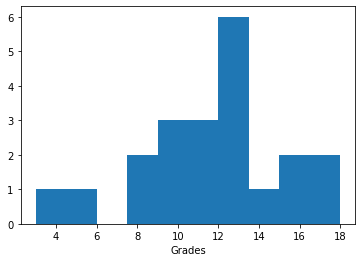

In [95]:
## Distribution
grades = np.array([5, 18, 13, 17, 8, 12, 11, 15, 8, 11, 12, 3, 11, 10, 9, 14, 13, 12, 16, 10, 13])
plt.hist(grades)
plt.xlabel('Grades')
plt.show()

In [96]:
def stats_info(x):
    print('mean value:',np.mean(x))
    print('median:',np.median(x))
    print('min and max:', np.min(x), np.max(x))
    print('standard deviation:',np.std(x))
stats_info(grades)

mean value: 11.476190476190476
median: 12.0
min and max: 3 18
standard deviation: 3.580623085163326


### Sample & Population

* For most of the case, we rarely observe on the population, we estimate mean, std, etc. on sample 

In [97]:
k = 5
random_student = random.choices(grades, k = 5) # sample with replacement from the original sample (Bootstrap)
print('{:-^30s}'.format('random sample of k = ' + str(k)))
stats_info(random_student) # We can see that the stats it actually quite the approx.

----random sample of k = 5----
mean value: 14.8
median: 14.0
min and max: 12 18
standard deviation: 2.3151673805580453


* The power of statistics (+ probability - distribution) comes from the fact that we can "estimate" the probability of distribution (density, cumulative) of the population from those of the sample
* The the probability of a subset of value: `Pr(X>0)` could be estimated (also, statistics test feasible)

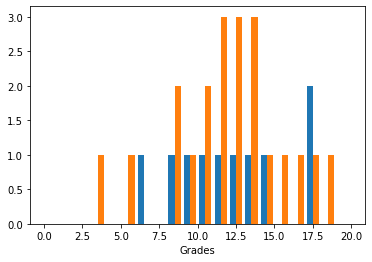

In [99]:
# Inferential Statistics: Guess the score of new students
mu = np.mean(grades)
sigma = np.std(grades)
# Assume that they have the normal distribution
# We can reconstruct the distribution with stats parameters mu, sigmu => Infer new data
infer_students = np.random.normal(mu, sigma, size=10) 
plt.hist([infer_students, grades], 20, range=[0,20], stacked=False)
plt.xlabel('Grades')
plt.show()

* Most of popular statistic metrics is to describe the curve of distribution

In [105]:
## Basics Statistics
import numpy as np
import statistics
n = 10
X = [int(num) for num in '64630 11735 14216 99233 14470 4978 73429 38120 51135 67060'.split()]
mean = np.mean(X)
median = np.median(X)
std = np.std(X)
ci_up = mean + 1.96 * std / np.sqrt(n)
ci_low = mean - 1.96 * std / np.sqrt(n)
def mode(X):
    X = sorted(X)
    val_count = {val:X.count(val) for val in set(X)}
    max_val = max(val_count.values())
    val_valid = {k:v for k,v in val_count.items() if v == max_val}
    out = [x for x in X if x in val_valid][0] # take smallest integer in multiple cases
    return int(out)
print('{:=^35s}'.format('Basic Statistics'))
print('Mean: {0:.1f}'.format(np.mean(X)))
print('Median: {0:.1f}'.format(np.median(X)))
print('Mode: {}'.format(mode(X)))
print('STD: {0:.1f}'.format(np.std(X)))
print('Confidence Interval: {0:.1f} {1:.1f}'.format(ci_low, ci_up))

=========Basic Statistics==========
Mean: 43900.6
Median: 44627.5
Mode: 4978
STD: 30466.9
Confidence Interval: 25017.0 62784.2


## Pearson Correlation
* Measure the association between 2 variables (take for value from -1 to 1)
* Be cautious, **Spurious Correlation**: Correlation doesn't mean necessarily causality!

In [113]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


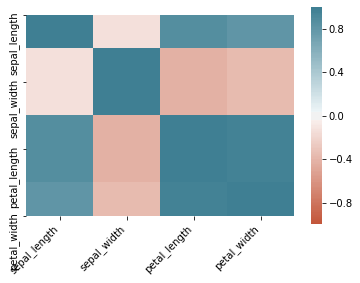

In [129]:
## Correlation Matrix
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [127]:
df = iris.loc[:,'sepal_length':'petal_width']
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [128]:
np.corrcoef(iris.sepal_length, iris.sepal_width)[0][1]

-0.11756978413300208


![pearson-corr.png](./images/pearson-corr.png)

* ρ(x,y)=std(x)×std(y)mean((x−mean(x))×(y−mean(y)))

In [109]:
physics_score = list(map(int, '15  12  8   8   7   7   7   6   5   3'.split()))
history_score = list(map(int, '10  25  17  11  13  17  20  13  9   15'.split()))
corr = np.corrcoef(physics_score, history_score)[0][1]
print('{:.3f}'.format(corr))

0.145


In [110]:
# DYI pearson corr formula
def pearson_corr(x, y):
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)
    xi_meanx = [i - mean_x for i in x]
    yi_meany = [i - mean_y for i in y]
    nu = sum([x * y for x, y in zip(xi_meanx, yi_meany)])
    de1 = sum([x ** 2 for x in xi_meanx]) * sum([y ** 2 for y in yi_meany])
    de = de1 ** 0.5 
    corr = nu / de 
    return corr

In [111]:
print('Pearson Correlation: {:.3f}'.format(corr))


Pearson Correlation: 0.145


## Correlation on Categorical Variables (Pearson Chi-Sqr)
> Reference: 
> * [Chi-Squared Test for ML](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)
> * [SPSS Tutorial](https://www.spss-tutorials.com/chi-square-independence-test/)

* From data of 2 categorical variables like this:
```
Sex,	Interest
Male,	Art
Female,	Math
Male, 	Science
Male,	Math
```
* We can summarize into the **Contingency table** as this: 
```

        Science,	Math,	Art
Male         20,      30,    15
Female       20,      15,    30
```

In [112]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# contingency table
table = [[30, 20, 15],[6, 9, 17]]
print(table)
print('{:-^32s}'.format('Chi2 Pearson Score'))
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
print(stat)
print('-'*32)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    ## H0: 2 variables is independent
	print('Dependent or 2 Variables correlated (reject H0)')
else:
	print('Independent (fail to reject H0)') 

[[30, 20, 15], [6, 9, 17]]
-------Chi2 Pearson Score-------
dof=2
[[24.12371134 19.43298969 21.44329897]
 [11.87628866  9.56701031 10.55670103]]
10.2578565359748
--------------------------------
probability=0.950, critical=5.991, stat=10.258
Dependent or 2 Variables correlated (reject H0)
